In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import psycopg2
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style = 'darkgrid')

In [3]:
con = psycopg2.connect(dbname='mimic', user='sudarshan', host='/var/run/postgresql')

In [8]:
def plot_intervals(df, mdf, n_notes, n_adms):    
    fig, ax = plt.subplots(2, 1, figsize=(20, 20))

    sns.barplot(x='hours', y='n_notes', data=df, ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45, ha='right', fontweight='bold', fontsize=12)
    ax[0].set_xlabel("")
    ax[0].set_ylabel('Number of notes', fontweight='bold', fontsize=15)
    ax[0].set_title('Distribution of notes and admissions w.r.t chart time and ICU admit time', fontweight='bold', fontsize=15)

    ax[0].text(len(df)/2, ax[0].get_ylim()[1]*0.75, f'Total number of notes = {n_notes}', fontweight='bold', fontsize=15, ha='center', va='bottom')

    for index, row in df.iterrows():
        ax[0].text(index, row['n_notes'], str(row['n_notes']), color='black', ha='center', va='bottom', fontweight='bold', fontsize=12)

    sns.barplot(x='hours', y='counts', hue='Legend', data=mdf, ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right', fontweight='bold', fontsize=12)
    ax[1].set_xlabel("Time between note chart time and ICU admit time (hours)\n 't' is the time-to-ICU admit time", fontweight='bold', fontsize=15)
    ax[1].set_ylabel('count', fontweight='bold', fontsize=15)

    ax[1].text(len(df)/2, ax[0].get_ylim()[1]*0.75, f'Total number of notes = {n_notes}\nTotal number of hospital admissions = {n_adms}', fontweight='bold', fontsize=15, ha='center', va='bottom')

    for index, row in mdf.iterrows():
        if index < len(mdf)//2:
            ax[1].text(index, row['counts'], str(row['counts']), color='black', ha='right', va='bottom', fontweight='bold', fontsize=12)
        else:
            ax[1].text(index % (len(mdf)//2) + 0.35, row['counts'], str(row['counts']), color='black', ha='right', va='bottom', fontweight='bold', fontsize=12)

In [5]:
query = """
select count(*) as n_notes, count(distinct hadm_id) as n_adms from data group by chartinterval order by chartinterval;
"""

df = pd.read_sql_query(query, con)
intervals = ['0 < t < 24', '24 < t < 48', '48 < t < 72', '72 < t < 96', '96 < t < 120', '120 < t < 144', '144 < t < 168', '168 < t < 192', '192 < t < 216', '216 < t < 240', '240 < t < 264', '264 < t < 288', '288 < t < 312', 't > 312']

df['hours'] = intervals

In [6]:
# df.drop(0, axis=0, inplace=True)
# df.reset_index(inplace=True, drop=True)

mdf = df.copy()
mdf.rename(columns={'n_adms':'Number of Admissions', 'n_notes':'Number of Notes'}, inplace=True)
mdf = pd.melt(mdf, id_vars='hours', var_name='Legend', value_name='counts')

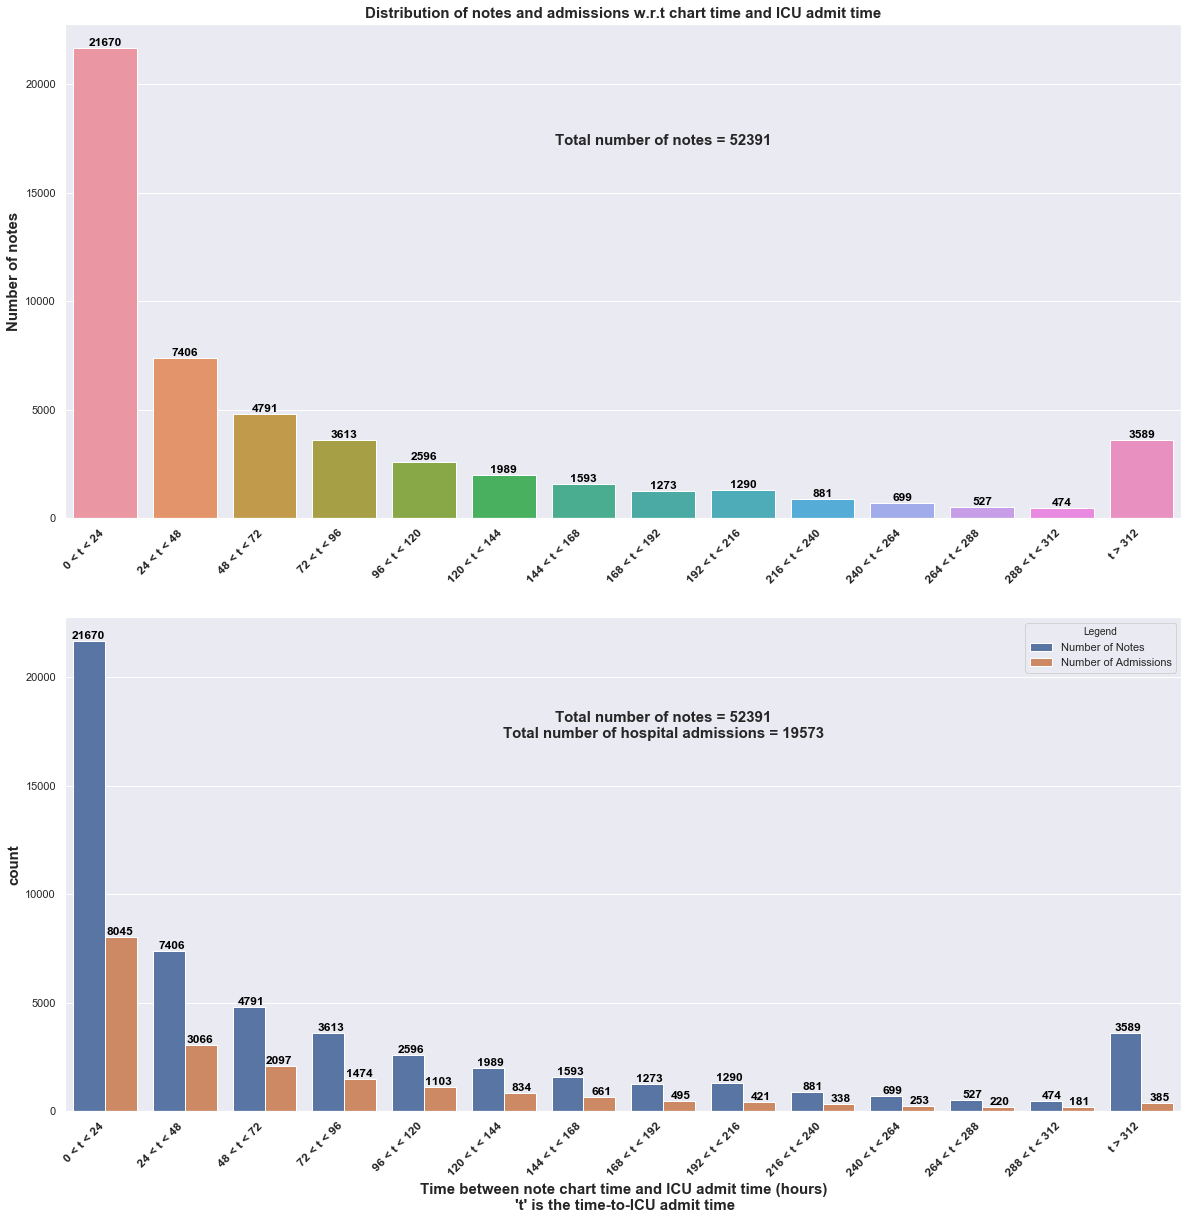

In [9]:
plot_intervals(df, mdf, df['n_notes'].sum(), df['n_adms'].sum())

In [ ]:
query = """
select count(*) as n_notes, count(distinct hadm_id) as n_adms from data group by chartinterval order by chartinterval;
"""

df = pd.read_sql_query(query, con)
intervals = ['0 < t < 180', '180 < t < 192', '192 < t < 204', '204 < t < 216', '216 < t < 228', '228 < t < 240', '240 < t < 252', '252 < t < 264', '264 < t < 276', 't > 276']

df['hours'] = intervals

df.drop(0, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

mdf = df.copy()
mdf.rename(columns={'n_adms':'Number of Admissions', 'n_notes':'Number of Notes'}, inplace=True)
mdf = pd.melt(mdf, id_vars='hours', var_name='Legend', value_name='counts')

plot_intervals(df, mdf, df['n_notes'].sum(), df['n_adms'].sum())

In [ ]:
query = """
select count(*) as n_notes, count(distinct hadm_id) as n_adms from data group by chartinterval order by chartinterval;
"""

df = pd.read_sql_query(query, con)
intervals = ['0 < t < 12', '12 < t < 24', '24 < t < 36', '36 < t < 48', '48 < t < 60', '60 < t < 72', '72 < t < 84', '84 < t < 96', '96 < t < 108', '108 < t < 120', '120 < t 132', '132 < t < 144', '144 < t < 156', '156 < t < 168', '168 < t < 180', 't > 180']
df['hours'] = intervals

mdf = df.copy()
mdf.rename(columns={'n_adms':'Number of Admissions', 'n_notes':'Number of Notes'}, inplace=True)
mdf = pd.melt(mdf, id_vars='hours', var_name='Legend', value_name='counts')

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

sns.barplot(x='hours', y='n_notes', data=df, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45, ha='right', fontweight='bold', fontsize=12)
ax[0].set_xlabel("")
ax[0].set_ylabel('Number of notes', fontweight='bold', fontsize=15)
ax[0].set_title('Distribution of notes w.r.t chart time and ICU admit time', fontweight='bold', fontsize=15)

ax[0].text(7, 14000, 'Total number of notes = 52,391', fontweight='bold', fontsize=15, ha='center', va='bottom')

for index, row in df.iterrows():
    ax[0].text(index, row['n_notes'] + 100, str(row['n_notes']), color='black', ha='center', va='bottom', fontweight='bold', fontsize=12)

sns.barplot(x='hours', y='counts', hue='Legend', data=mdf, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right', fontweight='bold', fontsize=12)
ax[1].set_xlabel("Time between note chart time and ICU admit time (hours)\n 't' is the time-to-ICU admit time", fontweight='bold', fontsize=15)
ax[1].set_ylabel('count', fontweight='bold', fontsize=15)

ax[1].text(7, 14000, 'Total number of notes = 52,391\nTotal number of hospital admissions = 10,610', fontweight='bold', fontsize=15, ha='center', va='bottom')

for index, row in mdf.iterrows():
    if index < 16:
        ax[1].text(index, row['counts']+100, str(row['counts']), color='black', ha='right', va='bottom', fontweight='bold', fontsize=12)
    else:
        ax[1].text(index % 16 + 0.4, row['counts']+100, str(row['counts']), color='black', ha='right', va='bottom', fontweight='bold', fontsize=12)

In [ ]:
query = """
select hadm_id, count(*) as n_notes from data group by hadm_id order by hadm_id;
"""
df = pd.read_sql_query(query, con)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.distplot(df['n_notes'], kde=False, ax=ax, rug=True, bins=100)
ax.set_xlabel('Number of notes', fontweight='bold', fontsize=15)
ax.set_ylabel('Number of hospital admissions', fontweight='bold', fontsize=15)
ax.set_title('Histogram of note distribution Vs number of hospital admissions', fontweight='bold', fontsize=15)
ax.set_ylim(0, 5500)
ax.set_xlim(0, 40)

ax.text(20, 4500, 'Total number of hospital admissions = 10,610', fontweight='bold', fontsize=15, ha='center', va='bottom')

In [ ]:
query = """
select hadm_id, avg(wait_period) as avg_wait_period from data group by hadm_id order by hadm_id;
"""
df = pd.read_sql_query(query, con)
df.head()

In [ ]:
df['avg_wait_period'].min(), df['avg_wait_period'].mean(), df['avg_wait_period'].max()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.distplot(df['avg_wait_period'], kde=False, ax=ax, bins=100)
ax.set_xlabel('Average wait_period per admission (hours)', fontweight='bold', fontsize=15)
ax.set_ylabel('Number of hospital admissions', fontweight='bold', fontsize=15)
ax.set_title('Histogram of average wait_period Vs number of hospital admissions', fontweight='bold', fontsize=15)
ax.set_xlim(0, 600)

ax.text(300, 3000, 'Total number of hospital admissions = 10,610', fontweight='bold', fontsize=15, ha='center', va='bottom')

In [ ]:
query = """
with test as (select subject_id, count(distinct hadm_id) as n_adms from data group by subject_id order by subject_id) select n_adms, count(*) from test group by n_adms order by n_adms;
"""
df = pd.read_sql_query(query, con)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x='n_adms', y='count', data=df, ax=ax)
ax.set_xlabel("Count of number of admissions", fontweight='bold', fontsize=15)
ax.set_ylabel('Number of admissions', fontweight='bold', fontsize=15)
ax.set_title('Distribution of count of number of admissions', fontweight='bold', fontsize=15)
for index, row in df.iterrows():
    ax.text(index, row['count'], str(row['count']), color='black', ha='center', va='bottom', fontweight='bold', fontsize=12)

In [ ]:
query = """
select length(text) as note_length from data;
"""
df = pd.read_sql_query(query, con)
df.head()

In [ ]:
df['note_length'].min(), df['note_length'].mean(), df['note_length'].max()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.distplot(df['note_length'], kde=False, ax=ax, bins=100)
ax.set_xlabel('Length of notes', fontweight='bold', fontsize=15)
ax.set_ylabel('Number of notes', fontweight='bold', fontsize=15)
ax.set_title('Distribution of note length', fontweight='bold', fontsize=15)
ax.set_xlim(0, 10000)

ax.text(5000, 8000, f"Total number of notes = {len(df)}\nmin = {df['note_length'].min()}, average = {df['note_length'].mean():0.2f}, max = {df['note_length'].max()}", fontweight='bold', fontsize=15, ha='center', va='bottom')

In [ ]:
con.close()